# Signal Power and Average Power Analysis

This notebook demonstrates the concepts of **power** and **average power** of signals according to Oppenheim's definitions from "Signals and Systems".

## Mathematical Definitions

### Continuous-Time Signals

#### Instantaneous Power
For a continuous-time signal $x(t)$, the instantaneous power is defined as:
$$p(t) = |x(t)|^2$$

#### Total Energy
The total energy of a continuous-time signal is defined as:
- **Over all time (infinite duration):**
  $$E = \int_{-\infty}^{\infty} |x(t)|^2 dt$$
- **Over a finite time interval $[t_1, t_2]$:**
  $$E_{[t_1, t_2]} = \int_{t_1}^{t_2} |x(t)|^2 dt$$

#### Average Power
The average power of a continuous-time signal can be defined in several contexts:

- **Over all time (infinite duration):**
  $$P_{avg} = \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} |x(t)|^2 dt$$

- **Over a finite time interval $[t_1, t_2]$:**
  $$P_{avg, [t_1, t_2]} = \frac{1}{t_2 - t_1} \int_{t_1}^{t_2} |x(t)|^2 dt$$

- **For periodic signals:**  
  If $x(t)$ is periodic with period $T_0$, the average power is computed over a single period:
  $$P_{avg, periodic} = \frac{1}{T_0} \int_{t_0}^{t_0 + T_0} |x(t)|^2 dt$$
  where $t_0$ is any starting time.

### Discrete-Time Signals

#### Instantaneous Power
For a discrete-time signal $x[n]$, the instantaneous power is defined as:
$$p[n] = |x[n]|^2$$

#### Total Energy
The total energy of a discrete-time signal is defined as:
- **Over all time (infinite duration):**
  $$E = \sum_{n=-\infty}^{\infty} |x[n]|^2$$
- **Over a finite interval $[n_1, n_2]$:**
  $$E_{[n_1, n_2]} = \sum_{n=n_1}^{n_2} |x[n]|^2$$

#### Average Power
The average power of a discrete-time signal can be defined in several contexts:

- **Over all time (infinite duration):**
  $$P_{avg} = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2$$

- **Over a finite interval $[n_1, n_2]$:**
  $$P_{avg, [n_1, n_2]} = \frac{1}{n_2 - n_1 + 1} \sum_{n=n_1}^{n_2} |x[n]|^2$$

- **For periodic signals:**  
  If $x[n]$ is periodic with period $N_0$, the average power is computed over a single period:
  $$P_{avg, periodic} = \frac{1}{N_0} \sum_{n=n_0}^{n_0 + N_0 - 1} |x[n]|^2$$
  where $n_0$ is any starting index.

### Classification
- **Energy Signal**: $E < \infty$ and $P_{avg} = 0$
- **Power Signal**: $P_{avg} > 0$ and $E = \infty$
- **Neither**: Signals that are neither energy nor power signals

### Important Note on Finite Duration Signals
In practice, we often work with finite-duration signals. For such signals:
- The energy will always be finite (since we integrate/sum over a finite interval)
- The average power depends on the signal's behavior over the finite duration
- Classification becomes an approximation based on the signal's theoretical infinite-duration behavior


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

def calculate_energy(signal, time):
    """
    Calculate the total energy of a continuous-time signal using numerical integration.
    
    Parameters:
    signal: array-like, the signal values
    time: array-like, the time vector
    
    Returns:
    energy: float, total energy of the signal
    """
    # Energy = integral of |x(t)|^2
    energy = np.trapezoid(np.abs(signal)**2, time)
    return energy

def calculate_average_power(signal, time):
    """
    Calculate the average power of a continuous-time signal.
    
    Parameters:
    signal: array-like, the signal values
    time: array-like, the time vector
    
    Returns:
    avg_power: float, average power of the signal
    """
    T = (time[-1] - time[0])
    energy = np.trapezoid(np.abs(signal)**2, time)
    avg_power = energy / T
    return avg_power

def calculate_energy_dt(signal):
    """
    Calculate the total energy of a discrete-time signal.
    
    Parameters:
    signal: array-like, the signal values
    
    Returns:
    energy: float, total energy of the signal
    """
    # Energy = sum of |x[n]|^2
    energy = np.sum(np.abs(signal)**2)
    return energy

def calculate_average_power_dt(signal):
    """
    Calculate the average power of a discrete-time signal.
    
    Parameters:
    signal: array-like, the signal values
    
    Returns:
    avg_power: float, average power of the signal
    """
    N = len(signal)
    energy = np.sum(np.abs(signal)**2)
    avg_power = energy / N
    return avg_power

def classify_signal(energy, avg_power, signal_type="continuous", duration=None):
    """
    Classify a signal as Energy Signal, Power Signal, or Neither.
    
    Parameters:
    energy: float, total energy of the signal
    avg_power: float, average power of the signal
    signal_type: string, "continuous" or "discrete"
    duration: float, duration of the signal (for context)
    
    Returns:
    classification: string, signal classification
    """
    # For finite duration signals, we classify based on the theoretical behavior
    # This is a simplified classification for educational purposes
    
    # If average power is very small, it's likely an energy signal
    if avg_power < 0.01:
        return "Energy Signal (finite duration approximation)"
    # If average power is significant, it's likely a power signal
    elif avg_power > 0.1:
        return "Power Signal (finite duration approximation)"
    else:
        return "Neither Energy nor Power Signal"

print("Signal Analysis Functions Loaded Successfully!")

Signal Analysis Functions Loaded Successfully!


## Example 1: Energy Signal - Exponential Decay

An exponential decay signal $x(t) = e^{-at}u(t)$ where $a > 0$ and $u(t)$ is the unit step function.

**Theoretical Analysis:**
- Energy: $E = \int_0^{\infty} e^{-2at} dt = \frac{1}{2a}$
- Average Power: $P_{avg} = 0$ (since the signal decays to zero)
- Classification: **Energy Signal**


Continuous-Time Exponential Decay Signal (a = 2.0)
Numerical Energy: 0.250008
Theoretical Energy: 0.250000
Average Power: 5.00e-02
Classification: Neither Energy nor Power Signal


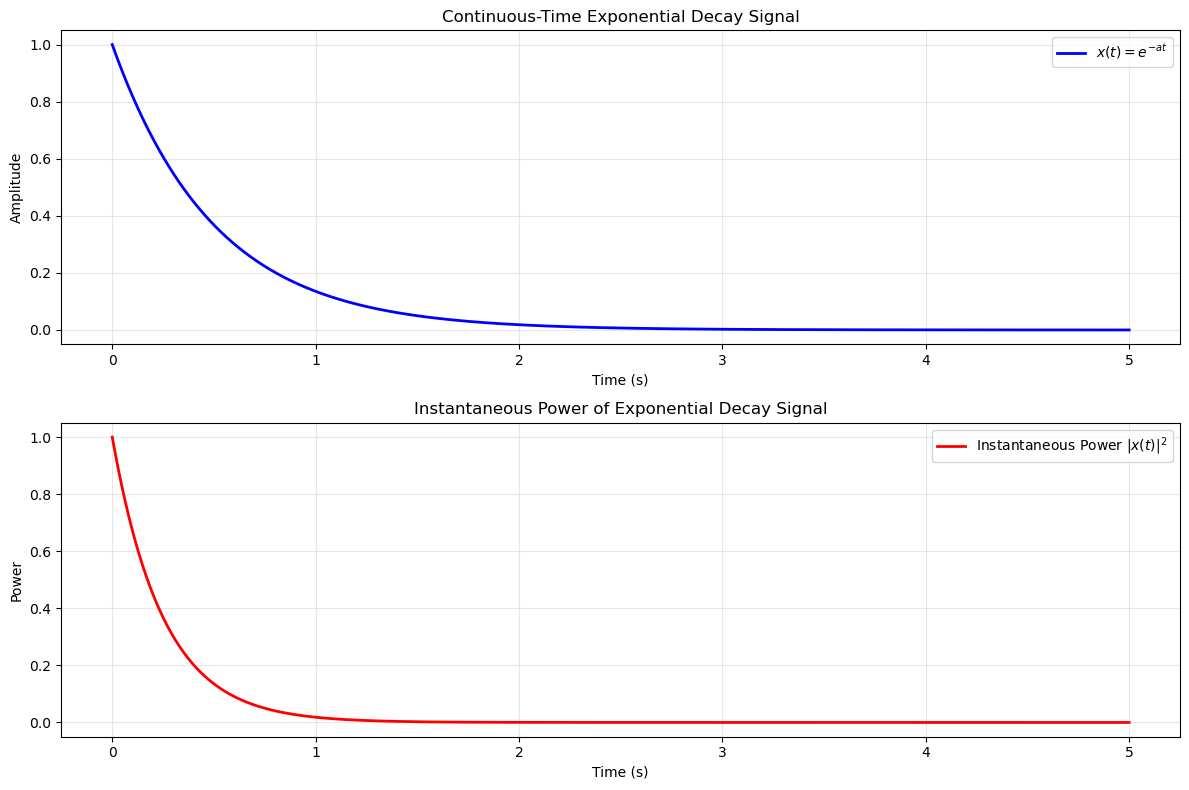

In [2]:
# Example 1: Exponential Decay Signal (Energy Signal) - Continuous-Time
a = 2.0  # decay constant
t = np.linspace(0, 5, 1000)  # time vector from 0 to 5 seconds

# Create exponential decay signal
x1 = np.exp(-a * t)

# Calculate instantaneous power
p1 = np.abs(x1)**2

# Calculate energy and average power
energy1 = calculate_energy(x1, t)
avg_power1 = calculate_average_power(x1, t)
classification1 = classify_signal(energy1, avg_power1)

# Theoretical energy for comparison
theoretical_energy1 = 1 / (2 * a)

print(f"Continuous-Time Exponential Decay Signal (a = {a})")
print(f"Numerical Energy: {energy1:.6f}")
print(f"Theoretical Energy: {theoretical_energy1:.6f}")
print(f"Average Power: {avg_power1:.2e}")
print(f"Classification: {classification1}")

# Plot the signal and its power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot signal
ax1.plot(t, x1, 'b-', linewidth=2, label='$x(t) = e^{-at}$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Continuous-Time Exponential Decay Signal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot instantaneous power
ax2.plot(t, p1, 'r-', linewidth=2, label='Instantaneous Power $|x(t)|^2$')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Power')
ax2.set_title('Instantaneous Power of Exponential Decay Signal')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Example 2: Power Signal - Sinusoidal Signal

A sinusoidal signal $x(t) = A\cos(\omega t + \phi)$ where $A$ is amplitude, $\omega$ is frequency, and $\phi$ is phase.

**Theoretical Analysis:**
- Energy: $E = \infty$ (signal extends over infinite time)
- Average Power: $P_{avg} = \frac{A^2}{2}$ (for cosine/sine signals)
- Classification: **Power Signal**


Continuous-Time Sinusoidal Signal (A = 3.0, f = 1.0 Hz)
Numerical Energy (over finite time): 45.000000
Average Power: 4.500000
Theoretical Average Power: 4.500000
Classification: Power Signal (finite duration approximation)


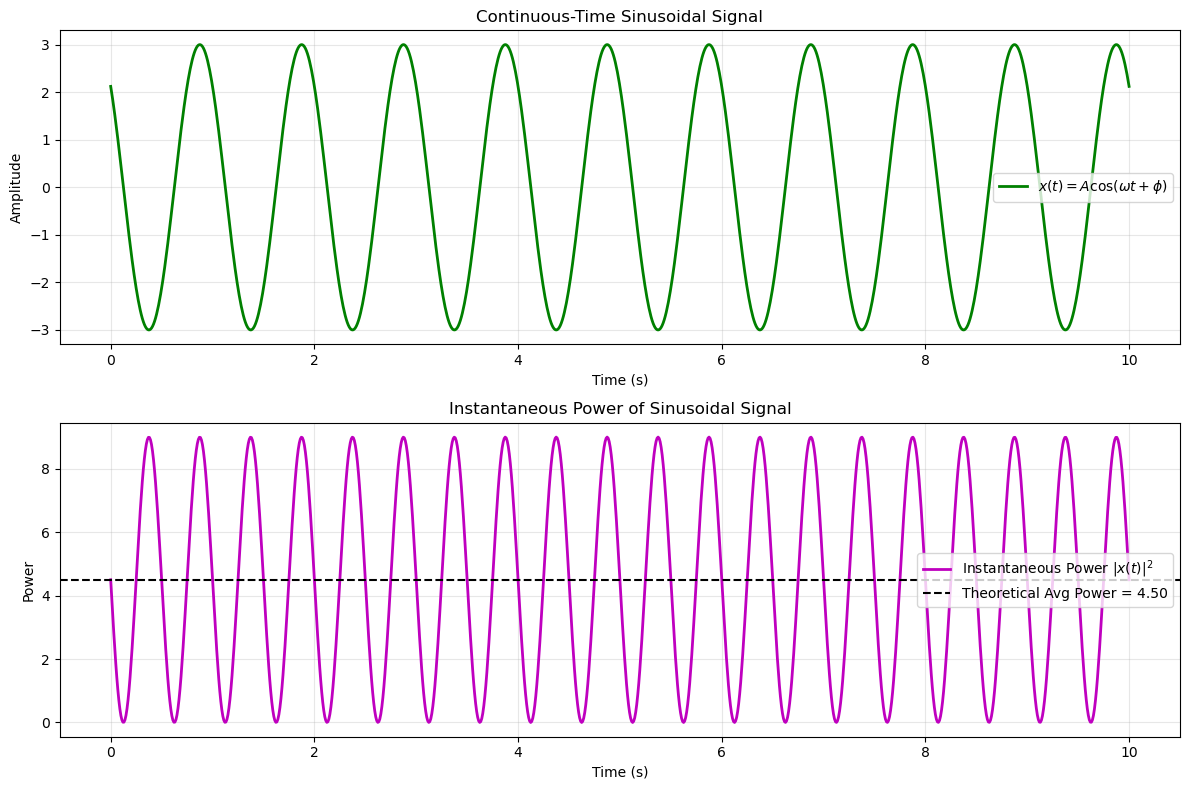

In [3]:
# Example 2: Sinusoidal Signal (Power Signal) - Continuous-Time
A = 3.0  # amplitude
f = 1.0  # frequency in Hz
omega = 2 * np.pi * f  # angular frequency
phi = np.pi/4  # phase shift
t = np.linspace(0, 10, 1000)  # time vector

# Create sinusoidal signal
x2 = A * np.cos(omega * t + phi)

# Calculate instantaneous power
p2 = np.abs(x2)**2

# Calculate energy and average power
energy2 = calculate_energy(x2, t)
avg_power2 = calculate_average_power(x2, t)
classification2 = classify_signal(energy2, avg_power2)

# Theoretical average power for comparison
theoretical_avg_power2 = A**2 / 2

print(f"Continuous-Time Sinusoidal Signal (A = {A}, f = {f} Hz)")
print(f"Numerical Energy (over finite time): {energy2:.6f}")
print(f"Average Power: {avg_power2:.6f}")
print(f"Theoretical Average Power: {theoretical_avg_power2:.6f}")
print(f"Classification: {classification2}")

# Plot the signal and its power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot signal
ax1.plot(t, x2, 'g-', linewidth=2, label='$x(t) = A\\cos(\\omega t + \\phi)$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Continuous-Time Sinusoidal Signal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot instantaneous power
ax2.plot(t, p2, 'm-', linewidth=2, label='Instantaneous Power $|x(t)|^2$')
ax2.axhline(y=theoretical_avg_power2, color='k', linestyle='--', 
           label=f'Theoretical Avg Power = {theoretical_avg_power2:.2f}')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Power')
ax2.set_title('Instantaneous Power of Sinusoidal Signal')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Example 3: Complex Exponential Signal

A complex exponential signal $x(t) = e^{j\omega t}$ where $j = \sqrt{-1}$.

**Theoretical Analysis:**
- Energy: $E = \infty$ (signal extends over infinite time)
- Average Power: $P_{avg} = 1$ (since $|e^{j\omega t}|^2 = 1$)
- Classification: **Power Signal**


Continuous-Time Complex Exponential Signal (ω = 3.14 rad/s)
Numerical Energy (over finite time): 8.000000
Average Power: 1.000000
Theoretical Average Power: 1.000000
Classification: Power Signal (finite duration approximation)


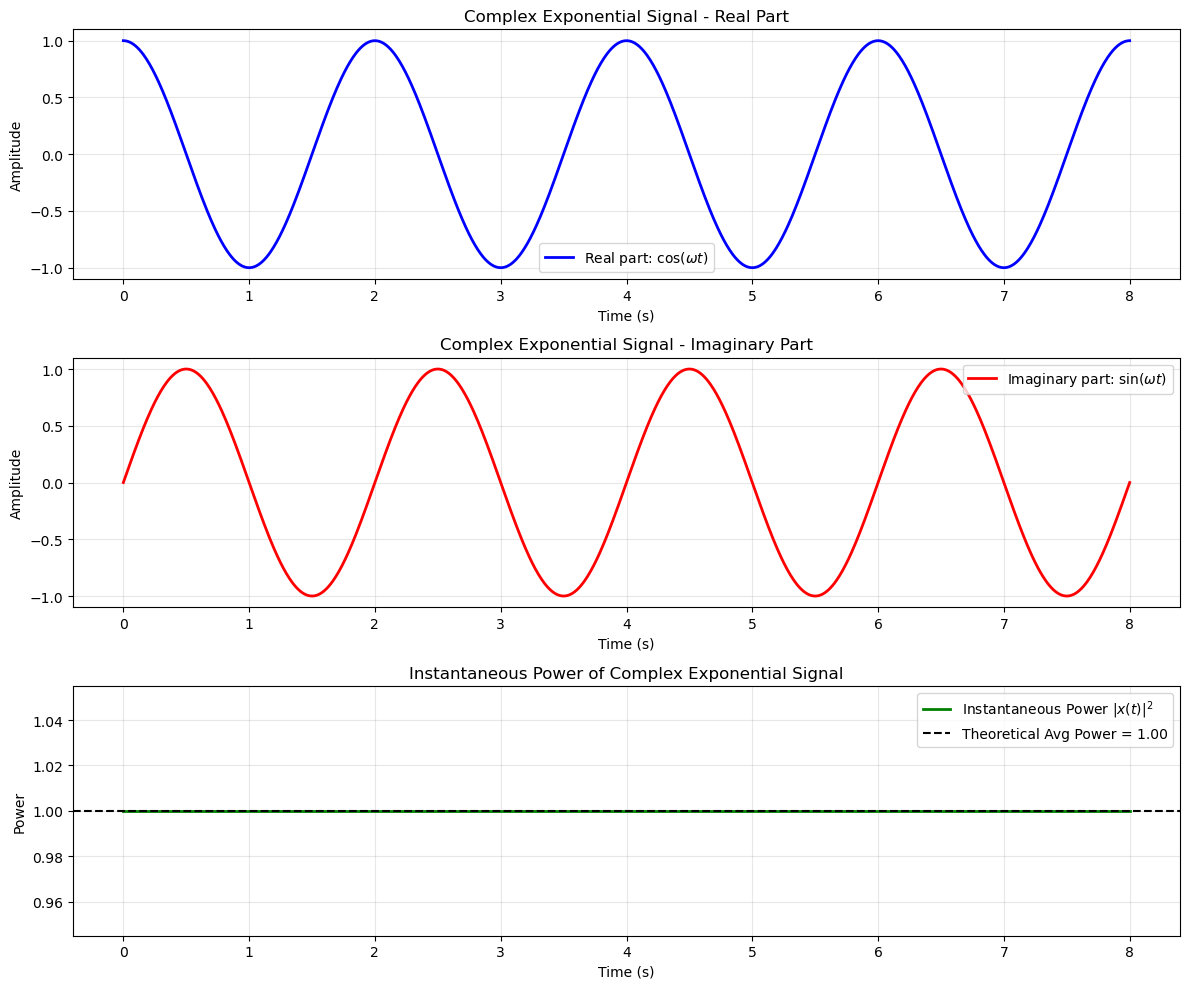

In [4]:
# Example 3: Complex Exponential Signal (Power Signal) - Continuous-Time
omega = 2 * np.pi * 0.5  # angular frequency
t = np.linspace(0, 8, 1000)  # time vector

# Create complex exponential signal
x3 = np.exp(1j * omega * t)

# Calculate instantaneous power (magnitude squared)
p3 = np.abs(x3)**2

# Calculate energy and average power
energy3 = calculate_energy(x3, t)
avg_power3 = calculate_average_power(x3, t)
classification3 = classify_signal(energy3, avg_power3)

# Theoretical average power
theoretical_avg_power3 = 1.0

print(f"Continuous-Time Complex Exponential Signal (ω = {omega:.2f} rad/s)")
print(f"Numerical Energy (over finite time): {energy3:.6f}")
print(f"Average Power: {avg_power3:.6f}")
print(f"Theoretical Average Power: {theoretical_avg_power3:.6f}")
print(f"Classification: {classification3}")


# Plot the signal and its power
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot real part
ax1.plot(t, np.real(x3), 'b-', linewidth=2, label='Real part: $\\cos(\\omega t)$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Complex Exponential Signal - Real Part')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot imaginary part
ax2.plot(t, np.imag(x3), 'r-', linewidth=2, label='Imaginary part: $\\sin(\\omega t)$')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Complex Exponential Signal - Imaginary Part')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot instantaneous power
ax3.plot(t, p3, 'g-', linewidth=2, label='Instantaneous Power $|x(t)|^2$')
ax3.axhline(y=theoretical_avg_power3, color='k', linestyle='--', 
           label=f'Theoretical Avg Power = {theoretical_avg_power3:.2f}')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Power')
ax3.set_title('Instantaneous Power of Complex Exponential Signal')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()


## Example 4: Discrete-Time Energy Signal - Exponential Decay

A discrete-time exponential decay signal $x[n] = a^n u[n]$ where $|a| < 1$ and $u[n]$ is the unit step function.

**Theoretical Analysis:**
- Energy: $E = \sum_{n=0}^{\infty} |a|^{2n} = \frac{1}{1-|a|^2}$ (for $|a| < 1$, infinite sum)
- Average Power: $P_{avg} = 0$ (since the signal decays to zero)
- Classification: **Energy Signal**

*Note: The numerical calculation uses a finite number of samples, so the energy will be less than the theoretical infinite sum.*


Discrete-Time Exponential Decay Signal (a = 0.8)
Numerical Energy: 2.777409
Theoretical Energy (infinite sum): 2.777778
Average Power: 0.138870
Classification: Power Signal (finite duration approximation)


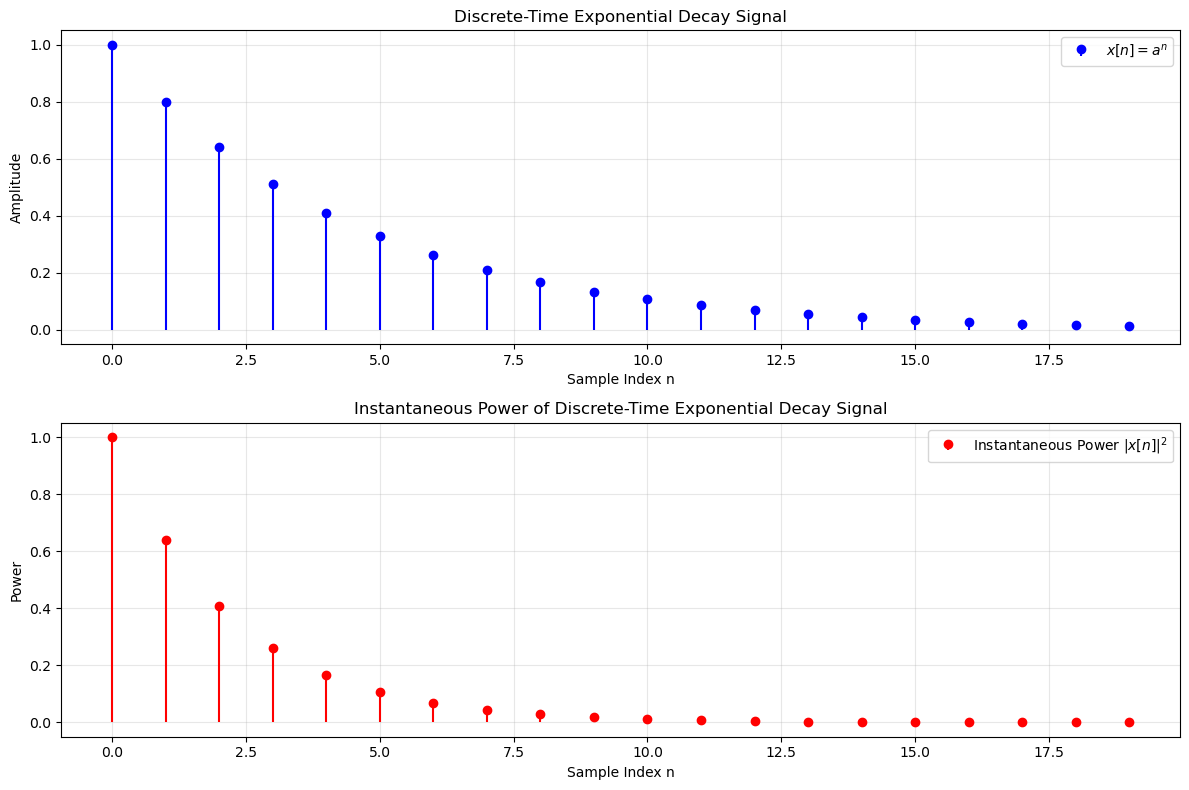

In [5]:
# Example 4: Discrete-Time Exponential Decay Signal (Energy Signal)
a = 0.8  # decay constant (must be |a| < 1 for finite energy)
n = np.arange(0, 20)  # discrete time indices

# Create discrete-time exponential decay signal
x4 = a**n

# Calculate instantaneous power
p4 = np.abs(x4)**2

# Calculate energy and average power
energy4 = calculate_energy_dt(x4)
avg_power4 = calculate_average_power_dt(x4)
classification4 = classify_signal(energy4, avg_power4)

# Theoretical energy for comparison (infinite sum)
theoretical_energy4 = 1 / (1 - a**2)

print(f"Discrete-Time Exponential Decay Signal (a = {a})")
print(f"Numerical Energy: {energy4:.6f}")
print(f"Theoretical Energy (infinite sum): {theoretical_energy4:.6f}")
print(f"Average Power: {avg_power4:.6f}")
print(f"Classification: {classification4}")

# Plot the signal and its power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot signal
ax1.stem(n, x4, 'b-', label='$x[n] = a^n$', basefmt=' ', linefmt='b-', markerfmt='bo')
ax1.set_xlabel('Sample Index n')
ax1.set_ylabel('Amplitude')
ax1.set_title('Discrete-Time Exponential Decay Signal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot instantaneous power
ax2.stem(n, p4, 'r-', label='Instantaneous Power $|x[n]|^2$', basefmt=' ', linefmt='r-', markerfmt='ro')
ax2.set_xlabel('Sample Index n')
ax2.set_ylabel('Power')
ax2.set_title('Instantaneous Power of Discrete-Time Exponential Decay Signal')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Example 5: Discrete-Time Power Signal - Sinusoidal Signal

A discrete-time sinusoidal signal $x[n] = A\cos(\omega n + \phi)$ where $A$ is amplitude, $\omega$ is frequency, and $\phi$ is phase.

**Theoretical Analysis:**
- Energy: $E = \infty$ (signal extends over infinite time)
- Average Power: $P_{avg} = \frac{A^2}{2}$ (for cosine/sine signals)
- Classification: **Power Signal**


Discrete-Time Sinusoidal Signal (A = 2.0, ω = 0.785 rad/sample)
Numerical Energy (over finite samples): 64.000000
Average Power: 2.000000
Theoretical Average Power: 2.000000
Classification: Power Signal (finite duration approximation)


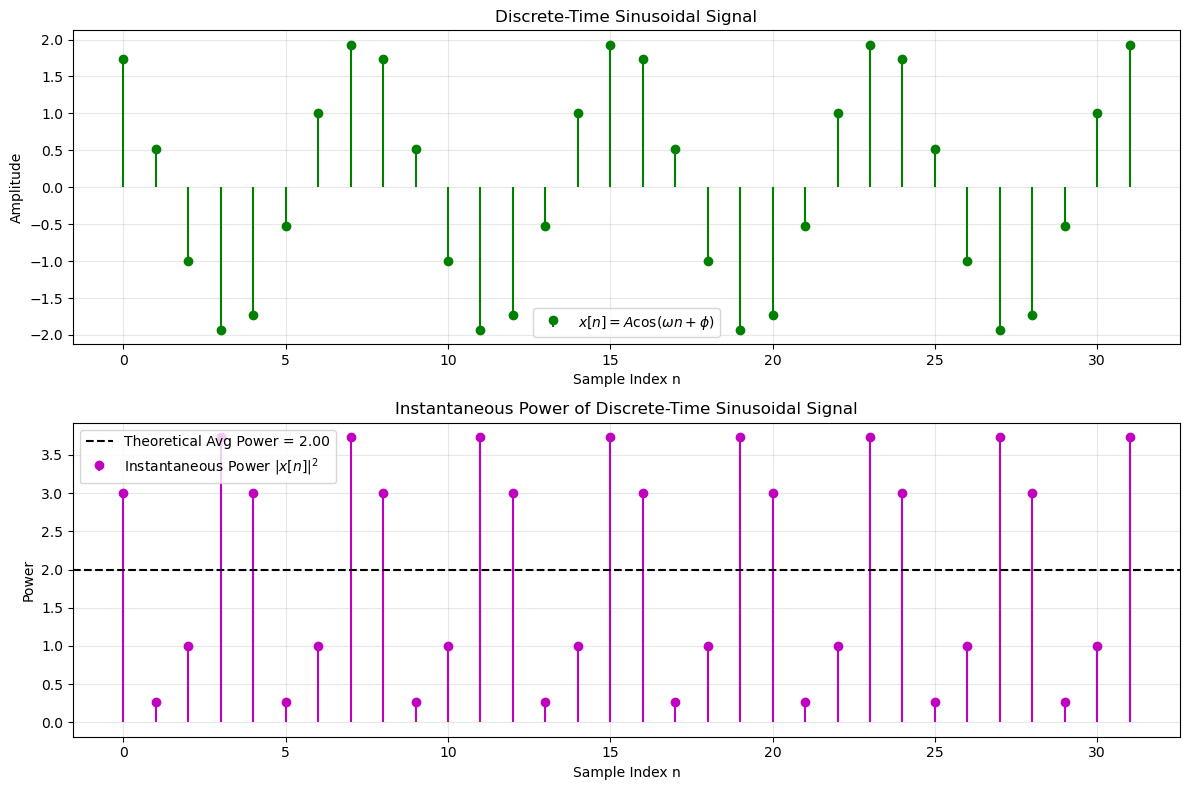

In [6]:
# Example 5: Discrete-Time Sinusoidal Signal (Power Signal)
A = 2.0  # amplitude
omega = np.pi / 4  # angular frequency
phi = np.pi / 6  # phase shift
n = np.arange(0, 32)  # discrete time indices

# Create discrete-time sinusoidal signal
x5 = A * np.cos(omega * n + phi)

# Calculate instantaneous power
p5 = np.abs(x5)**2

# Calculate energy and average power
energy5 = calculate_energy_dt(x5)
avg_power5 = calculate_average_power_dt(x5)
classification5 = classify_signal(energy5, avg_power5)

# Theoretical average power for comparison
theoretical_avg_power5 = A**2 / 2

print(f"Discrete-Time Sinusoidal Signal (A = {A}, ω = {omega:.3f} rad/sample)")
print(f"Numerical Energy (over finite samples): {energy5:.6f}")
print(f"Average Power: {avg_power5:.6f}")
print(f"Theoretical Average Power: {theoretical_avg_power5:.6f}")
print(f"Classification: {classification5}")

# Plot the signal and its power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot signal
ax1.stem(n, x5, 'g-', label='$x[n] = A\\cos(\\omega n + \\phi)$', basefmt=' ', linefmt='g-', markerfmt='go')
ax1.set_xlabel('Sample Index n')
ax1.set_ylabel('Amplitude')
ax1.set_title('Discrete-Time Sinusoidal Signal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot instantaneous power
ax2.stem(n, p5, 'm-', label='Instantaneous Power $|x[n]|^2$', basefmt=' ', linefmt='m-', markerfmt='mo')
ax2.axhline(y=theoretical_avg_power5, color='k', linestyle='--', 
           label=f'Theoretical Avg Power = {theoretical_avg_power5:.2f}')
ax2.set_xlabel('Sample Index n')
ax2.set_ylabel('Power')
ax2.set_title('Instantaneous Power of Discrete-Time Sinusoidal Signal')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Summary

This notebook demonstrated the fundamental concepts of signal power and energy analysis:

### Key Concepts Covered:
1. **Mathematical Definitions**: Instantaneous power, total energy, and average power for both continuous-time and discrete-time signals
2. **Signal Classification**: Energy signals, power signals, and signals that are neither
3. **Practical Implementation**: Numerical methods for calculating energy and power
4. **Examples**: Five comprehensive examples covering different signal types

### Important Takeaways:
- **Energy Signals**: Have finite energy and zero average power (e.g., exponential decay)
- **Power Signals**: Have infinite energy but finite average power (e.g., sinusoidal signals)
- **Finite Duration**: In practice, we work with finite-duration signals, making classification an approximation
- **Numerical Methods**: Trapezoidal integration for continuous-time, summation for discrete-time

### Applications:
These concepts are fundamental in:
- Signal processing and analysis
- Communication systems
- Control systems
- Digital signal processing
- Rotordynamics and vibration analysis

The classification of signals as energy or power signals is crucial for understanding their behavior and choosing appropriate analysis techniques.
